# 사전 학습 모델

## 언어 모델(language model)

- 시퀀스에 확률을 부여하는 모델
    - 단어 시퀀스를 입력받아 해당 시퀀스가 얼마나 그럴듯 한지 확률을 출력하는 모델
      
    - 한국어 말뭉치로 학습한 언어 모델은 자연스러운 한국어 문자에 높은 확률값을 부여함
 
- 문장에서 i번째로 등장하는 단어를 wi로 표시한다면 n개 단어로 구성된 문장이 해당 언어에서 등장할 확률, 즉 모델의 출력은 P(w1,w2,...,wn) 처럼 쓸 수 있음

    - n개 단어가 동시에 나타날 결합 확률(joint probability)을 의미
 
    - 잘 학습된 한국어 모델이 있다면 P(무모, 운전) 보다는 **P(난폭, 운전)이 큰 확률값**을 지녀야 함
 
- "난폭"이 나타난 다음에 "운전" 이 나타날 확률을 조건부 확률(conditional probability) 이라고 함
    - P(운전|난폭) = P(난폭, 운전) / P(난폭)
 
    - 조건부 확률을 표기할 때 결과가 되는 사건을 앞에, 조건이 되는 사건을 뒤에 씀
        - 결과가 되는 사건(운전)은 조건이 되는 사건(난폭)의 영향을 받아 변함
            - 앞선 단어가 "난폭" 이라면 다음 단어로 자연스러운 단어는 선택지가 줄어들기 때문
         
- 단어 3개가 동시에 등장할 결합 확률 수식

- P(w1, w2, w3) = P(w1) * P(w2|w1) * P(w3|w1, w2)

- 단어 3개로 구성된 문장이 나타나려면 다음 3가지 사건이 동시에 일어나야함
    - 첫 번째 단어(w1) 이 등장
    - 첫 번째 단어 등장 후 두번째 단어(w2) 등장
    - 첫 번째 단어와 두번째 단어 등장 후 세번째 단어(w3) 등장

- 전체 단어 시퀀스가 나타날 확률은 이전 단어들이 주어졌을 때 다음 단어가 등장할 확률의 연쇄
    - 이 때문에 언어 모델을 "이전 단어들이 주어졌을 때 다음 단어가 나타날 확률을 구하는 모델"이라고 정의하기도함

- GPT 같은 언어 모델은 엄청난 언어 데이터가 있으니... 진짜 자연스러운 한국어...가 나오는 것이다...

### 순방향 언어 모델(forward language model)

- 임의의 단어 시퀀스가 해당 언어에서 얼마나 자연스러운지 이해하고 있는 언어모델을 구축하려면 이전 단어들이 주어졌을 때 다음 단어 맞히기로 정해도 목표를 달성할 수 있음


<img src="./image/forward_language_model.png" width="500">

- 위 이미지에서 검은색 단어는 컨텍스트, 주황색 단어는 맞혀야 할 다음 단어
    - 문장 앞부터 뒤로 , 사라미이 이해하는 순서대로 계산하는 모델을 순방향 언어 모델 이라고함
- GPT , ELMo 같은 모델이 이런 방식으로 사전 학습을 수행함

### 역방향 언어 모델 (backward language model)

- 방향만 바뀌었을 뿐이고 다음 단어 맞히기 과정에서 전체 단어 시퀀스가 나타날 확률을 계산 할 수 있음


  <img src="./image/backward_language_model.png" width="500">

## 넓은 의미의 언어 모델

- 최근에는 언어 모델을 다음 수식과 같이 정의함
    - P(w|context)
 
- 이는 컨텍스트(주변 맥락 정보)가 전제된 상태에서 특정 단어가 나타날 조건부 확률을 나타냄

- 이렇게 정의된 언어 모델은 단어나 단어시퀀스로 구성된 컨텍스트를 입력받아 특정단어가 나타날 확률을 출력

### 마스크 언어 모델(masked language model)

- 학습 대상 문장에 빈칸을 만들어 놓고 해당 빈칸에 올 단어로 적절한 단어가 무엇일지 분류하는 과정으로 학습
- Bert 가 대표적인 마스크 언어 모델
<img src="./image/masked_language_model.png" width="500">

- 검정색 단어는 컨텍스트, 주황색 단어는 맞혀야 할 타깃 단어
    - 위 이미지에서 첫줄에서 컨텍스트는 [MASK] 카페 갔었어 거기 사람 많더라 이고, 맞힐 대상은 "어제"임

- 마스크 언어 모델은 맞힐 단어를 계산할 때 문장 전체의 맥락을 참고할 수 있다는 것이 장점

    - 따라서 마스크 언어 모델에는 양방향성(맞힐 단어 앞뒤를 모두 보는 특성)이 있음

### skip-gram model

- 어떤 단어 앞뒤에 특정 범위를 정해 두고 이 범위 내에 어떤 단어들이 올지 분류하는 과정으로 학습

<img src="./image/skip-gram.png">

## 언어 모델의 유용성

- 잘 학습된 언어 모델은 어떤 문장이 자연스러운지 가려낼 수 있어 그 자체로 값어치가 있음
    - 학습 대상 언어의 풍부한 맥락을 포함하고 있다는 점도 장점
      
- 기계 번역, 문법 교정, 문장 생성 등 다양한 태스크를 수행 할 수 있음
    - 기계 번역 : P(? | You can't be free from death)
    - 문법 교정 : P(두시 삼심 이분) > P(이시 서른 두분)
    - 문장 생성 :P(?| 발 없는 말이)

<img src = "./image/kcbert-large.png">

- 위 이미지는 네이버 댓글 데이터로 학습한 Bert 모델의 계산 결과

- 최근 언어 모델이 주목받는 이유 중 하나는 데이터 제작 비용 때문

- 다음 단어 맞히기나 빈칸 맞히기로 학습 태스크를 구성하면 사람이 일일 이 수장업 하지 않아도 많은 학습 데이터를 확보할 수 있음

- 대규모 언어 모델 학습이 가능

- 또 하나의 이유는 전이 학습
    - 대량의 말뭉치로 사전 학습한 언어 모델을 다운스트림 태스크에 적용하면 적은 양의 데이터로도 성능을 큰 폭으로 올릴 수 있음

    - 최근 제안되느 기법들은 사전 학습 언어 모델을 바탕으로 할 때가 많음
    
    - 언어 모델의 최종 출력 값 또는 중간값 출력값(임베딩) 으로 다양한 태스크 수행

# 트랜스포머

- 2017년 구글이 제안한 seq2seq 모델

## seq2seq 

- 트랜스 포머는 sea2sea 과제를 수행하는 모델
    - 시퀀스 : 단어 같은 무언가의 나열
    - seq2sea: 특정 속성을 지닌 시퀀스를 다른 소석의 시퀀스로 변환하는 작업
      
- 기계 번역을 예시로 든다면 소스 언어의 토큰 시퀀스를 다른 언어의 토큰시퀀스로 변환하는 과제
    - 예) 어제, 카페에 , 갔었어, 거기, 사람, 많더라(소스 언어)
    - I, went, to , the , cafe, there, were, many , people , there (타깃 언어)
      
- seq2seq2는 소스와 타깃의 길이가 달라도 해당 과제를 수행하는데 문제가 없음

  
- ai 모델 만들면 검증 1년하고 구글 같은 큰 기업들이 함 써봄 => 실제로 우리가 쓸 수 있는 때는 4~ 5년뒤

## 인코더와 디코더

- 트랜스포머는 seq2seq 과제 수행에 특화된 모델로써, 임의의 시퀀스를 해당 시퀀스와 속성이 다른 시퀀스로 변환
- 하는 작업이라면 꼭 기계 번역이 아니더라도 수행할 수 있음
- 예) 필리핀 앞바다 한달 치 기온 데이터로 앞으로 1주일간 하루 단위로 태풍이 발생할 지 여부를 맞히는 과제(기온의 시퀀스 => 태풍 발생 여부의 시퀀스)

- seq2seq 과제를 수행하는 모델은 인코더(encoder)와 디코더 (decoder)부분으로 구성됨
<img src="./image/encoder_decoder.png">

- 인코더는 소스 시퀀스의 정보를 압축해 디코더로 보내는 역할
    - 인코더가 소스 시퀀스 정보를 압축하는 과정을 인코딩 이라고 함
- 디코더는 인코더가 보내 준 소스 시퀀스 정보를 받아서 타깃 시퀀스를 생성
    - 디코더가 타깃 시퀀스를 생성하는 과정을 디코딩 이라고 함

<img src="./image/transformer.png" height="500">

## 모델 학습과 인퍼런스

- 인코더 입력으로 어제, 카페, 갔었어, 거기, 사람, 많더라 처럼 소스 시쿠넌스 전체가 입력되고, 디코더 입력은 \<s> 가 됨
- <s> : 타깃 시퀀스의 시작을 뜻하는 스페셜 토큰

- 인코더는 소스 시퀀스르 압축해 디코더로 보내고, 디코더는 인코더에서 보내온 정보와 현재 디코더 입력을 모두 고려해 다음 토큰맞힘
- 복잡한 rnn 같은 느낌임
- 트랜스포머의 최종 출력(위 그램에서 다음 토큰 확률)은 **타깃 언어의 어휘 수 만큼의 차원**으로 구성된 벡터
    - 타깃 언어의 어휘가 3만개라면 디코더 출력은 3만차원의 벡터
 
- 트랜스포머의 학습은 인코더와 디코더 입력이 주어졌을때 정답에 해당하는 단어의 확률값을 높이는 방식으로 수행
- 타깃 시퀀스 가운데 다음 요소인 went 를 예측할 차례라면
    - 인코더 입력은 소스 시퀀스 전체, 디코더 입력은 "\<s> I"
 
- 학습 중의 디코더 입력과 인퍼런스(학습을 마친 후 모델을 실제로 사용)
    - 학습 과정에는 디코더 입력에 맞혀야 할 단어 이전의 정답 타깃 시퀀스를 넣음
    - 인퍼런스 과정에는 디코더 입력에 직전 디코딩 결과를 사용
    - 예) 모델이 직전 디코더 출력에서 I 대신 you 가 나왔다면 다음 디코더 입력은 "\<s> you"

## 트랜스포머 블록

<img src="./image/encoder_block.png" width="200">

- 위 이미지는 트랜스포머의 인코더의 반복되는 요소를 나타낸 것
    - 이런 구조를 블록 또는 레이어 라고 함
- 트랜스포머의 인코더는 인코더 블록을 수십 개 쌓아서 구성
- 인코더 블록의 구성 요소
    - 멀티 헤드 어텐션(multi-head attention)
    - 피드포워드 뉴럴 네트워크(feedforward neural network)
    - 잔차 연결 및 레이어 정규화

<img src = "./image/decoder_block.png" width="300">

- 디코더 블록도 인코더 블록과 본질적으로 다르지 않지만 , 마스크를 적용한 멀티 헤드 어텐션과 인코더가 보내 온 정보와 디코더 입력을 함께 이용해 멀티 헤드 어텐션을 수행하는 모듈이 추가됨

## 셀프 어텐션

- 어텐션은 시퀀스 입력에 수행하는 기계학습 방법의 일종
  
- 시퀀스 요소 가운데 중요한 요소에 집중하고, 그렇지 않은 요소는 무시해 태스크 수행 성능을 끌어 올림

- 어텐션은 기계번역 과제에 처음 도입되었음
  
- 타깃 언어를 디코딩 할때 소스 언어의 단어 시퀀스 가운데 디코딩에 도움이 되는 단어 위주로 취사선택해서 번역 품질을 끌어올릴 수 있음

- 즉, 어텐션은 디코딩할 때 소스 시퀀스 가운데 **중요한 요소만 추림**

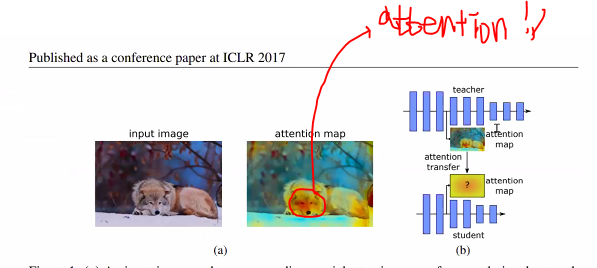

- 셀프 어텐션은 자신에게 수행!
    - 입력 시퀀스 가운데 태스크 수행에 의미 있는 요소들 위주로 정보를 추출

### 합성곱이랑 비교해보자

- 자연어는 기본적으로 시퀀스이고, 특정 단어를 기준으로 한 주변 문백이 의미 형성에 중요한 역할을 하므로 CNN이 자연어 처리에 널리 쓰이고 있음

<img src="./image/cnn_text.png" width="500">

- cnn 은 길이가 너무 길면 xxxxxxxx

### 순환 신경망이랑 비교해보자

- RNN 은 시퀀스 길이가 길어질수록 정보 압축에 문제가 발생
    - 오랜 전에 입력된 단어는 잊어버리거나, 특정 단어 정보를 과도하게 반영해 전체 정보를 왜곡하는 경우가 자주 생김

- 기계 번역을 할 때 RNN을 사용한다면 인코더가 디코더로 넘기는 정보는 소스 시퀀스의 마지막인 "많더라" 라는 단어의 의미가 많이 반영될 수 밖에 없음

- RNN 자주 과적합이 일어난다 (삼성전자 집착 모델이 만들어진다)

- 길이가 길어져도 문맥파악할수있음 attention 최고 ~

### 어텐션과 비교

<img src="./image/attention.png" width="500">

- 위 이미지에서는 cafe  에 대응하는 소스 언어인 단어는 카페이고 이는 소스 시퀀스의 초반부에 등장
- 단순 RNN을 사용하면 초반에 입력된 단어라 모델이 잊었을 가능성이 크고, 번역 품질이 낮아짐

- 어텐션은 위와 같은 문제점을 해결하고자 제안됨

- 디코더 쪽 RNN 어텐션을 추가하는 방식
    - 디코더가 타깃 시퀀스를 생성할 때 소스 시퀀스 전체에서 어떤 요소에 주목해야할지 알려주므로, 카페가 소스 시퀀스 초반에 등장하거나 소스 시퀀스의 길이가 길어져도 번역 품질이 떨어지는 것을 막을 수 있음

## 특징 및 장점

<img src="./image/self-attention.png" width="500">

- 셀프 어텐션은 자기 자신에 수행하는 어텐션
    - 위 이미지는 "거기" 라는 단어가 어떤 의미를 가지는지 계산하는 상황

- 잘 학습된 셀프 어텐션 모델이라면 "거기"에 대응하는 장소는 카페 라는 사실을 알아야 함
    - 추가로 "거기"는 "갔었어" 와도 연관이 있음
 
- 트랜스 포머 인코더 블록 내부에서는 "거기"라는 단어를 인코딩할 때 카페, 갔었어 라는 단어의 의미를 강조해서 반영함

- 셀프 어텐션 수행 대상은 입력 시퀀스 저네

- 예) 어제 - 전체 입력 시퀀스, 카페 - 전체 입력 시퀀스 , 갔었어 - 전체 입력 시퀀스 등 모두 어텐션을 수행함

- 개별 단어와 전체 입력 시퀀스를 대상으로 어텐션 계산을 수행해 문맥 전체를 고려하므로 지역적인 문맥만 보는 CNN보다 강점이 있음

- 모든 경우의 수를 고려하기 때문에 시퀀스의 길이가 길어져도 정보를 잊거나 왜곡할 우려도 없으므로 RNN의 단점도 극복

- 어텐션과 셀프 어텐션의 주요 차이

    - 어텐션은 소스 시퀀스 전체 단어들과 타깃 시퀀스 단어 하나 사이를 연결하지만, 셀프 어텐션은 입력 시퀀스 전체 단어들 사이를 연결
    - 어텐션 RNN구조 위에서 동작하지만 셀프 어텐션은 RNN 없이 동작
    - 타깃 언어의 단어를 1개 생성할때 어텐션은 1회 수행하지만, 셀프 어텐션은 인코더, 디코더 블록의 개수만큼 반복 수행

### 계산 예시
- 셀프 어텐션은 쿼리(query), 키(key), 밸류(value) 3가지 요소가 서로 영향을 주고 받는 구조

- 각 단어 벡터는 블록 내에서 쿼리, 키 , 밸류 3가지로 변환

- 만약 트랜스포머 브록에 입력되는 문장이 6개 단어로 구성되어 있다면 이 블록 셀프 어텐션 계산 대상은 쿼리 벡터 6개 , 키 벡터 6개 밸류 벡터 6개 모두 18개 가됨

<img src="./image/self-attention_calculate.png" width="500">

- 셀프 어텐션 모듈은 위와 같은 결과에 밸류 벡터들을 **가중합** 하는 방식으로 계산
    - Z카페 = 0.1 * V어제 + 0.1 * V카페 + 0.2 + V갔었어 + 0.4 * V거기 + 0.1 * V사람 + 0.1 * V많더라

- 모든 단어에 대해 셀프 어텐션을 각각 수행한 후 그 결과를 다음 블록으로 전달

#  셀프 어텐션 동작 원리
## 모델 입력과 출력 
- 인코더 입력은 소스 시퀀스의 입력 임베딩에 **위치 정보(positional encoding)** 를 더해서 만듦
    - 소스 언어 문자의 토큰 인덱스 시퀀스
 
- 단어 수준 임베딩은 모델 학습을 수행하는 과정에서 함께 학습됨

- 입력 임베딩에 더하는 위치 정보는 해당 토큰이 문장 내에서 **몇 번째 위치인가**를 나타냄

    - 예) "어제는" 첫 번째, "카페는" 두 번째, "갔었어" 는 세 번째
 
- 트랜스포머의 출력층은 디코더 마지막 블록의 출력 벡터 시퀀스
    - 타깃 언어의 어휘 수만큼의 차원을 갖는 벡터

## 셀프 어텐션 내부 동작

In [2]:
import torch
import numpy as np
from torch.nn.functional import softmax

### 1) 쿼리, 키, 밸류 생성

- 임베딩 까지는 거친것임 ( 백터로 들어오죵 )

In [3]:
# 입력 벡터 시퀀스 X
x = torch.tensor(
    
    [
        [1,0,1,0],
    [0,2,0,2],
    [1,1,1,1],
    ], dtype = torch.float64
                
                
                )

In [4]:
x

tensor([[1., 0., 1., 0.],
        [0., 2., 0., 2.],
        [1., 1., 1., 1.]], dtype=torch.float64)

- 인코더에서 수행되는 셀프 어텐션의 입력은 이전 이코더 블록의 출력 벡터 시퀀스
- 임베딩 차원 수 가 4이고, 인코더에 입력된 단어 개수가 3일 경우 셀프 어텐션 입력은 위의 x와 같은 형태가 됨
    - 4차원 짜리 단어 임베딩이 3개 모인 형태
- 셀프 어텐션은 쿼리, 키, 밸류 3개 요소 사이의 문맥적 관계성을 추출하는 과정
    - Q = X * WQ
    - K = X * WK
    - V = X * WV
- 위의 수식처럼 입력 벡터 시퀀스(X) 에 쿼리, 키 , 밸류를 만들어주는 행렬 (WQ, WK, WV)을 각각 곱함

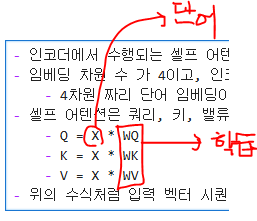

In [5]:
# 단어 A의 입장에서 다른 단어와의 관계계산~
w_query = torch.tensor([
    [1, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 1]
], dtype= torch.float64)

w_key = torch.tensor([
    [0, 0, 1],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 0]
], dtype= torch.float64)


w_value = torch.tensor([
    [0, 2, 0],
    [0, 3, 0],
    [1, 0, 3],
    [1, 1, 0]
], dtype= torch.float64)

In [6]:
# 쿼리 계산함
querys = torch.matmul(x, w_query)
querys

tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]], dtype=torch.float64)

In [7]:
keys = torch.matmul(x, w_key)
keys

tensor([[0., 1., 2.],
        [4., 4., 0.],
        [2., 3., 2.]], dtype=torch.float64)

In [8]:
values = torch.matmul(x, w_value)
values

tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]], dtype=torch.float64)

- w_query, w_key, w_value 는 태스크를 가장 잘 수행하는 방향으로 학습됨

### 2) 셀프 어텐션 출력값 계산!

- 셀프 어텐션의 정의
<img src = "./image/self-attention_def.png" width ="500">

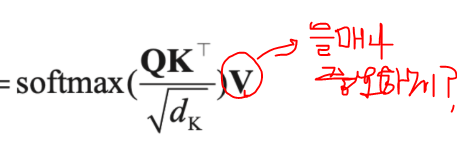

- value 랑 key 의 전치는 왜하는 거임? : key 값이랑 행렬곱을 할려고 하는데 상관 없는 애들이랑 곱해지면 안되니까 k 를 전치하는거임

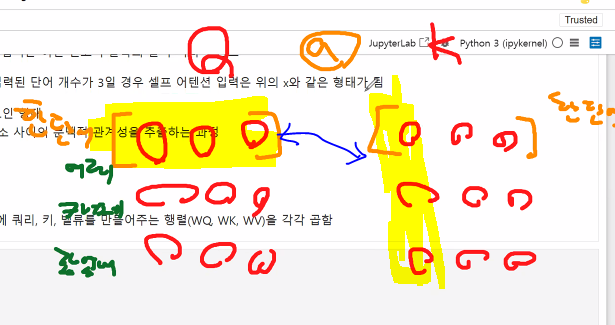

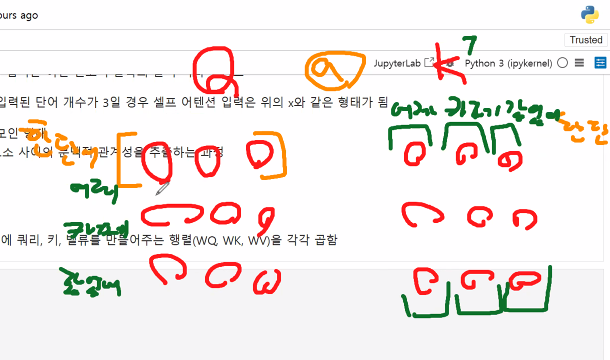

- 짜잔~

- 쿼리와 키 벡터에 전치를 취한 행렬을 행렬곱한 뒤 해당 행렬의 모든 요솟값을 키 차원수의 제곱근으로 나누고, 이 행렬을 행 단위로 소프트맥스를 취해(합쳐서 1.0 이 되도록 0에서 1사이의 수로 변형) 스코어 행렬로 만들고 이 스코어 행렬에 밸류(V)를 행렬곱

## 전치전치전치전치전치전치전치전치전치전치

In [19]:
keys.T

tensor([[0., 4., 2.],
        [1., 4., 3.],
        [2., 0., 2.]], dtype=torch.float64)

In [20]:
attn_scores = torch.matmul(querys, keys.T)

In [21]:
attn_scores

tensor([[ 4.,  4.,  6.],
        [ 6., 16., 14.],
        [ 7., 12., 13.]], dtype=torch.float64)

- [2, 4, 4] 에서는 2는 첫 번째 퀄리 벡터와 첫번째 키 벡터 사이의 문맥적 관계성이 결합된 결과물
- 두 번째 요솟값 (4)은 첫 번째 퀄리 벡터와 두번째 키 벡터, 세번째 요솟값(4)는 첫번째 쿼리 벡터와 세번째 키벡터 사이의 문맥적 관계성이 포함되어 있음

## 차원에 루트 씌울것이야!!!!!!!!!!!!

In [22]:
keys.shape # [단어 수, 단어 표현]

torch.Size([3, 3])

In [23]:
# 소프트 맥스 확률값
key_dim_sqrt = np.sqrt(keys.shape[-1])

In [24]:
attn_probs = softmax(attn_scores / key_dim_sqrt, dim = 1)

In [25]:
attn_probs # attention 확률

tensor([[0.1933, 0.1933, 0.6134],
        [0.0024, 0.7586, 0.2391],
        [0.0197, 0.3525, 0.6279]], dtype=torch.float64)

## V 곱해!!!!

In [26]:
# 소프트 맥스 확률과 밸류를 가중합
weighted_values = torch.matmul(attn_probs, values)

In [28]:
weighted_values # 각 단어에 대한 의미

tensor([[1.8067, 5.6134, 2.4201],
        [1.9976, 7.5077, 0.7243],
        [1.9803, 6.6263, 1.9426]], dtype=torch.float64)

- 셀프 어텐션의 학습 대상은 쿼리, 키, 밸류를 만드는 가중치 행렬 (WQ,WK,WV)임

## 멀티 헤드 어텐션(Multi-Head Attention)

- 셀프 어텐션을 동시에 여러 번 수행

<img src="./image/multi-head_attention.png" width="500">

- 위 이미지에서 입력 단어 수는 2개, 밸류의 차원은 3, 헤드는 8개 인 멀티 헤드 어텐션을 나타냄
- 개별 헤드의 셀프 어텐션 수행 결과는 "입력 단어 수 * 밸류 차원 수"
- 위 이미지에서는 2*3 크기를 갖는 행렬

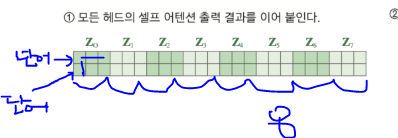

- 8개의 헤드의 셀프 어텐션 수행 결과를 이어 붙이면 2 * 24의 행렬이 됨
- 멀티 헤드 어텐션은 갤별 헤드의 셀프 어텐션 수행 결과를 이어 붙인 행렬
- W0 를 행렬곱해서 마무리 WO 의 크기는 "셀프 어텐션 수행 결과 행렬의 열 수 * 목표 차원 수"

## 인코더에서 수행하는 셀프 어텐션

- 인코더에서 수행되는 셀프 어텐션은 쿼리, 키 , 밸류가 모두 소스 시퀀스와 관련된 정보
- 예) 트랜스 포머의 학습 과제가 한국어에서 영어로 번역하는 태스크라면 인코더의 쿼리, 키 , 밸류는 모두 한국어

<img src  ="./image/self-attention_calculate.png" width="500">

## 디코더에서 수행하는 셀프 어텐션

- 마스크 멀티 헤드 어텐션
- 타깃 언어의 단어 벡터 시퀀스를 계산 대상으로 함
- 예) 한국어를 영어로 번역하는 태스크를 수행하는 모델이라면 대상은 영어 단어 시퀀스
<img src = "./image/masked_multi-head_attention.png" width="300">

- 멀티 헤드 어텐션
    - 인코더와 디코더 쪽 정보를 모두 활용
    - 인코더에서 넘어오는 정보는 소스 언어 문장의 단어 벡터 시퀀스
    - 디코더 직전 블록에서 넘어오는 정보는 타깃 언어 문장의 단어 벡터 시퀀스
    - 인코더의 정보를 키, 디코더의 정보를 쿼리로 삼아 셀프 어텐션 계산을 수행

<img src="./image/decoder_multi-head_attention.png" width="300">

- 하지만 학습 과정에서는 약간의 변형이 있음
    - 모델이 한국어를 영어로 번역하는 태스크를 수행하고 있다면 영어 문장의 다음 단어로 어떤 것이 적절할 지에 관한 확률이 최종 출력이 됨
    
    - 하지만 학습 과정에서 모델이 이번에 맞혀야할 정답을 알려주게 되면 학습하는 의미가 사라짐
 
      
    - 따라서 정답을 포함한 타깃 시퀀스의 미래 정보를 셀프 어텐션 계산에서 제외(마스킹)하게 됨
        - 구체적으로는 타깃 시퀀스에 대한 마스크 멀티 헤드 어텐션 계산 시 제외 대상 단어들의 소프트맥스 확률이 0 이되도록하여 **멀티 헤드 어텐션에도 해당 단어들이 무시되게 하는 방식**으로 수행

<!-- <img src = "./image/masking.png" width="300"> -->
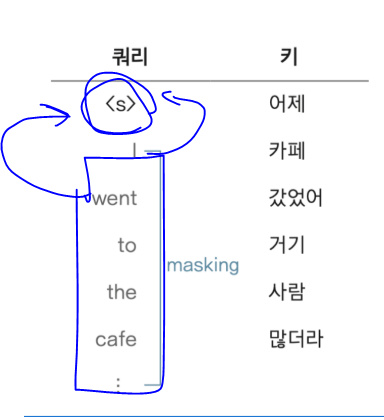

- 위 이미지에서 셀프 어텐션을 수행하면 마지막 블록 출력 벡터 가운데 \<s>에 해당하는 벡터에는 소스 문장 전체와 \<s> 사이의 문맥적 관계성이 함축
- 트랜스포머는 이 정보를 가지고 I를 맞히도록 학습

# 트랜스포머에 적용된 기술들

## 피드 포워드 뉴럴 네트워크

- 멀티 헤드 어텐션의 출력은 입력 단어들에 대응하는 벡터 시퀀스

- 이후 벡터 각각을 피드 포워드 뉴럴 네트워크에 입력
    - 피드 포워드 뉴럴 네트워크의 입력은 현재 블록의 멀티 헤드 어텐션의 개별 출력 벡터

In [32]:
# 피드포워드 뉴럴 네트워크 계산예시

x = torch.tensor([2,1])
x

tensor([2, 1])

In [33]:
w1 = torch.tensor([[3,2,-4],[2,-3,1]]) # 유닛들
b1 = 1 # 절편
w2 = torch.tensor([[3,2],[2,-3],[2,-3]])
b2 = -1

In [34]:
h_preact = torch.matmul(x, w1) + b1

In [35]:
h = torch.nn.functional.relu(h_preact)

In [36]:
y = torch.matmul(h, w2) + b2
y

tensor([30, 11])

- 트랜스포머에서는 은닉층의 유닛 개수를 입력층의 4배로 설정하여, 만약 피드 포워드 뉴럴 네트워크 벡터가 768차원일 경우 2048차원까지 늘렸닥가 출력층에서 768차원으로 줄임 => **깊이있는 특징을 뽑아내고 다시 차원을 줄여버리기~~~**

### 잔차 연결(residual connection)

- 블록이나 레이어 계산을 건너뛰는 경로를 하나 두는 것

<img src="./image/residual_connection.png" width="700">

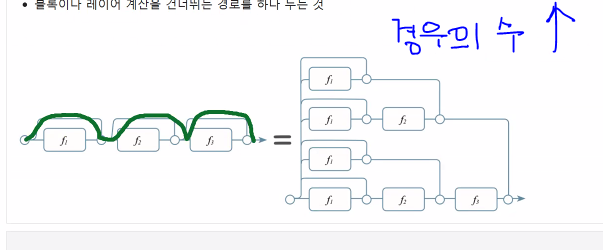

- 여러가지 관점에서 훈련함
    - 위 이미지에서 잔차 연결을 두지 않는다면 f1, f2, f3를 연속으로 수행하는 경로 한 가지만 존재하지만, 잔차 연결을 블록마다 설정해둠으로써 모두 8가지의 새로운 경로가 생김
    - 모델이 다양한 관점에서 블록 계산을 수행하게 됨
 
- 딥러닝 모델은 레이어가 많아지면 학습이 어려워지는 경향이 있음
    - 모델을 업데이트하기 위한 신호(그레디언트)가 전달되는 경로가 길어지기 때문
- 잔차 연결은 모델 중간에 블록을 건너뛰는 경로를 설정함으로써 학습을 쉽게하는 효과

### 레이어 정규화(layer normalization)

- 미니 배치의 인스턴스 별로 평균을 빼고 표준편차로 나눠 정규화를 수행

- 레이어 정규화를 수행하면 학습이 안정되고, 그 속도가 빨라지는 효과가 있음

In [37]:
# 배치 크기가 2인 경우 레이어 정규화 수행 과정~~~~

inputs = torch.tensor([
    [1,2,3], # 첫번째 데이터
    [1,1,1], # 두번째 데이터
], dtype = torch.float32)

In [39]:
m = torch.nn.LayerNorm(inputs.shape[-1]) # LayerNorm : 레이어 정규화 3이 들어옴

In [40]:
output = m(inputs)

In [41]:
output

tensor([[-1.2247,  0.0000,  1.2247],
        [ 0.0000,  0.0000,  0.0000]], grad_fn=<NativeLayerNormBackward0>)

In [42]:
np.mean(inputs.numpy(), axis = 1) # 첫번째 데이터의 값 2 / 두번째는 1

array([2., 1.], dtype=float32)

In [43]:
np.std(inputs.numpy(), axis = 1) 

array([0.8164966, 0.       ], dtype=float32)

(데이터 - 평균) / 표준편차

- batch Normalization 처럼 *1 + 1 을 한다고여~~~ 학습을 유리한 방향으로 하기위해서

- 레이어 정규화에서는 평균을 빼고 표준편차로 나눈 결과에 감마를 곱하고 베타를 더함

In [44]:
m.weight # requires_grad=Tru => 학습합니다~~

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)

In [45]:
m.bias

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)

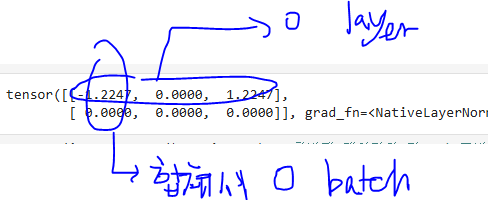

- 파이토치의 LayerNorm 객체는 두 값을 각각 1과 0으로 초기화함
    - 학습 초기 레이어 정규화 수행은 인스턴스의 평균을 빼고 표준편차로 나눈 결과에 1을 곱한 후 0을 더함
 
    - 이후 학습 과정에서는 태스크를 가장 잘 수행하는 방향으로 두 값을 업데이트

## 모델 학습 기법

### 드롭아웃

- 과대적합 현상을 방지하고자 유닛의 일부를 확률적으로 0으로 대치

In [56]:
m = torch.nn.Dropout(0.2)

inputs = torch.randn(1, 10) # shape 1 행 10열을 가지게 된다 

In [57]:
inputs # dropout 에 들어갈 값

tensor([[ 0.6129,  0.1125,  0.4310,  0.5701,  0.9887,  0.3603, -1.5483, -0.5864,
         -0.7484, -0.1951]])

In [58]:
output = m(inputs)
output

tensor([[ 0.7661,  0.1406,  0.5388,  0.7126,  1.2358,  0.4504, -0.0000, -0.7330,
         -0.9356, -0.2438]])

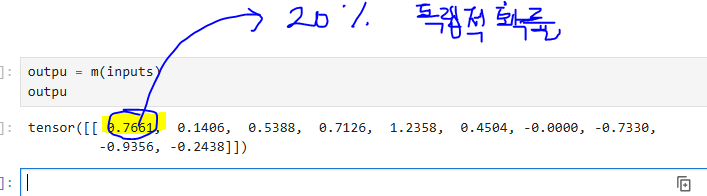

- 드롭 아웃 후에 값의 크기가 0이 되지 않는 애들을 좀 증폭시킨다!!!!! 몇몇개가 0 이 되었기 때문에 그럼

- 드롭아웃은 유닛별로 드롭아웃을 수행할지 말지를 확률적으로 결정함
    - 0.2로 설정하면 드롭아웃 수행 비율이 평균적으로 20%가 되겠끔 하겠다는 이야기
 
- 안정적인 학습을 위해 각 요솟값에 1 / (1-p) 를 곱하는 역할도 수행
    - P가 0.2 이면 1.25 를 곱하는 셈

- 트랜스 포머 모델에서 드롭아웃은 입력 임베딩과 최초 블록 사이, 블록과 블록 사이, 마지막 블로과 출력층 사이등에 적용
    - 드롭아웃 비율은 10%로 설정하는것이 일반적

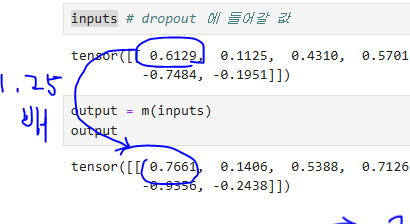

- 드롭아웃은 학습 과정에만 적용하고 학습이 끝나고 나서 인퍼런스 과정에서는 적용하지 않음

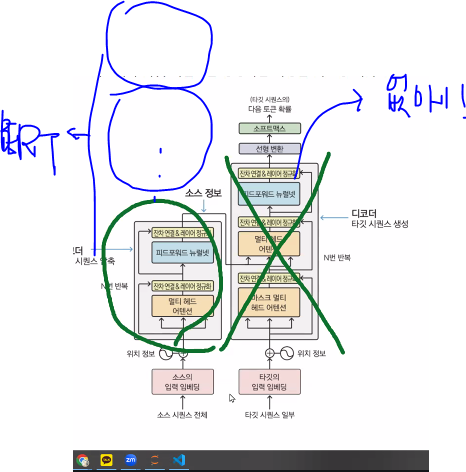

- 반대는 GPT 인코더는 장식이다!
- 그럴싸한 개소리를 잘 지껄인다

# BERT 와 GPT 비교

- **GPT**(사기꾼! 딕문가! 기계랑 사귀지 마세여)
    - 이전 단어들이 주어졌을 때 다음 단어가 무엇인지 맞히는 과정에서 사전학습
    - 문장 왼쪽부터 오른쪽으로 순차적으로 계산한다는 점에서 일방향(unidirectional)
    - 문장 생성에 강점을 지님
    - 트랜스포머에서 **디코더**만 취해 사용
      
- **BERT**(대학교교수님)
    - 문장 중간에 빈칸을 만들고 해당 빈칸에 어떤 단어가 적절할지 맞히는 과정에서 사전학습
    - 빈칸 앞뒤 문맥을 모두 살필 수 있다는 점에서 **양방향** 성격을 가짐
    - 문장의 의미를 추출하는데 강점을 지님
    - 트랜스포머에서 **인코더**만 취해 사용함

## GPT 구조

<img src= "./image/gpt.png">

- GPT 는 트랜스포머에서 인코더를 제외하고 디코더만 사용
    - 인코더 쪽에서 보내오는 정보를 받는 모듈(멀티 헤드 어텐션)도 제거되어 있음

- 입력 단어 시퀀스 "어제 카페 갔었어 거기 사람 많더라" 이고 , 이번이 카페를 맞혀야하는 상황이라면 GPT 는 "어제" 라는 단어만 참고할 수 있음

- 예제는... 필터를 빡세게 거는...예아...

## BERT 

<img src="./image/bert.png">

- 트랜스포머에서 디코더를 제외하고 인코더만 사용

- 입력 단어 시퀀스가 "어제 카페 갔었어 [MASK] 사람 많더라" 라면 마스크 토큰 앞뒤 문백을 모두 참고할 수 있음
    - 앞뒤 정보를 준다고 해서 정답을 미리 알려주는 것이 아님

# 사전학습 모델로 단어/문장을 벡터로 변환

## 파인 튜닝

- 사전학습을 마친 언어 모델 위에 작은 모듈을 조금 더 쌓아 태스크를 수행하는 구조
- 사전학습을 마친 BERT 와 그 위의 작은 모듈을 포함한 전체 모델을 다운스트림 데이터로 업데이트하는 과정을 파인튜닝

- kcvert : 네이버 영화 감상평 분류 모델
- 출력층만 고칠것임 ~~~ => 파인튜닝~~~~ 

In [60]:
from transformers import BertTokenizer, BertConfig, BertModel # 허깅페이스에서 만들어진 라이브러리
import torch

In [61]:
# 토크나이저 선언
tokenizer = BertTokenizer.from_pretrained(
    "beomi/kcbert-base", # 허깅페이스에서 복사해오셈
    # https://huggingface.co/beomi/kcbert-base 
    do_lower_case = False
)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

- 모델 초기화
    - 사용대상 BERT 모델이 사전학습할 때 썼던 토크나이저를 그대로 사용해야 벡터 변환에 문제가 없음
    - 모델과 토크나이저의 토큰화 방식이 다르면 모델이 엉뚱한 결과를 출력

In [62]:
# BERT 모델을 사전학습할 때 설정했던 설정값
pretrain_model_config = BertConfig.from_pretrained(
    "beomi/kcbert-base"
)
pretrain_model_config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 300,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.57.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30000
}

In [63]:
# 위의 설정에 따라 모델 전체를 초기화한 뒤 미리 학습된 kcbert-base 체크 포인트를 읽어들임
model = BertModel.from_pretrained(
    "beomi/kcbert-base",
    config = pretrain_model_config
)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [66]:
# 입력값 만들기
sentences = [
    "안녕하세요",
    "홀리몰리 홀리몰리"
]

features = tokenizer(
    sentences, 
    max_length = 10,
    padding = "max_length", 
    truncation = True
)

In [67]:
features

{'input_ids': [[2, 19017, 8482, 3, 0, 0, 0, 0, 0, 0], [2, 3446, 4038, 4512, 4038, 3446, 4038, 4512, 4038, 3]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

- input_ids  는 2개의 입력문장에 대해 워드 피스 토큰화르 수행한 뒤 이를 토큰 인덱스로 변환한 결과
- Bert 모델은 문장시작에 CLS< 끝에 SEP 스페셜 토큰을 추가하므로 문자 2개 모두 앞뒤에 각 토큰에 대응하는 인덱스 2,3 이 붙었음

In [68]:
# features 값을 bert 모델에 넣을것임

# BERT 로 단어/문장 수준 벡터 구하기
# 'input_ids': [[value...]] 배열을 tensor 타입으로 변환한거임~

features = {
    k: torch.tensor(v) for k , v in features.items()
}

In [69]:
features

{'input_ids': tensor([[    2, 19017,  8482,     3,     0,     0,     0,     0,     0,     0],
         [    2,  3446,  4038,  4512,  4038,  3446,  4038,  4512,  4038,     3]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [70]:
# 임베딩 계산

outputs = model(**features)

In [71]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.6969, -0.8248,  1.7512,  ..., -0.3732,  0.7399,  1.1907],
         [-1.4803, -0.4398,  0.9444,  ..., -0.7405, -0.0211,  1.3064],
         [-1.4299, -0.5033, -0.2069,  ...,  0.1285, -0.2611,  1.6057],
         ...,
         [-1.4406,  0.3431,  1.4043,  ..., -0.0565,  0.8450, -0.2170],
         [-1.3625, -0.2404,  1.1757,  ...,  0.8876, -0.1054,  0.0734],
         [-1.4244,  0.1518,  1.2920,  ...,  0.0245,  0.7572,  0.0080]],

        [[ 0.6592, -0.1182, -0.0054,  ..., -0.6729,  1.4362,  0.5756],
         [ 1.2123,  0.7416,  0.2247,  ...,  1.2117, -0.1198, -0.0049],
         [ 1.0154,  0.3145, -1.0562,  ..., -0.8264,  0.7413, -1.4831],
         ...,
         [ 0.7828, -0.9747,  0.2382,  ...,  1.8101,  0.8503,  0.7735],
         [ 0.5812,  0.3884, -0.8217,  ..., -0.5522, -0.1783, -0.6682],
         [ 0.4603,  0.3411,  0.6892,  ...,  0.1619,  0.8000, -0.2023]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_ou

## 단어수준을 학습할때

In [73]:
# 문장 2개에 속한 각각의 토큰(시퀀스의 길이 10) 이 768차원의 벡터로 변환
# 단어 수준 백터 시퀀스
outputs.last_hidden_state.shape

torch.Size([2, 10, 768])

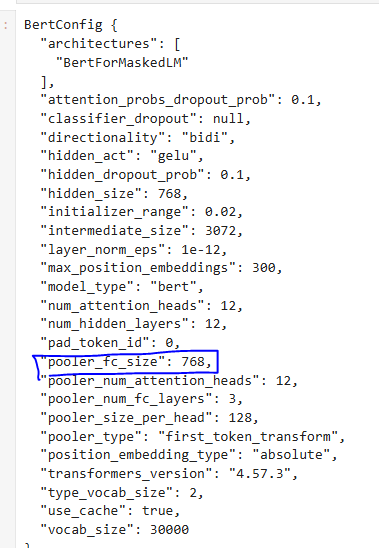

## 문장수준을 학습할때

In [74]:
# 문장에서의 특성수~~~벡터~~~~~
outputs.pooler_output.shape

torch.Size([2, 768])